# <span style="color:red"> Numerical Simulation 12 </span>

## **Exercise 12.1**

I've tested 3 optimizers (plus the SGD one) and checked their performances comparing the loss and accuracy functions.

- SGD: accuracy of the train set is much lower than the one of the test.

- Adagrad: it seems to work better than SGD, it has accuracy of both train and test that tend to the same value of 0.98.

- Adadelta: it's very similar to Adagrad, but accuracy of train goes higher than the test's one (higher than 0.98). 

- Adamax: it works slightly worse than Adadelta, but it still has an high accuracy(0.978).

From this tests I think the better ones are Adagrad and Adamax.

- **SGD optimizer**

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.3794 - accuracy: 0.8923 - val_loss: 0.2353 - val_accuracy: 0.9345
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3057 - accuracy: 0.9134 - val_loss: 0.1997 - val_accuracy: 0.9407
Epoch 4/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.2664 - accuracy: 0.9254 - val_loss: 0.1730 - val_accuracy: 0.9496
Epoch 5/5
10000/10000 [==============================] - 0s 45us/step

Test loss: 0.15416169580742717
Test accuracy: 0.9532999992370605


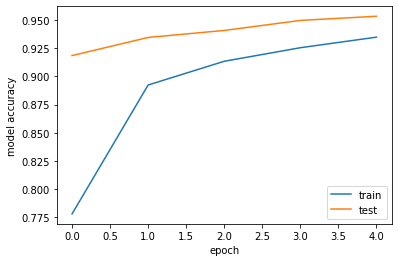

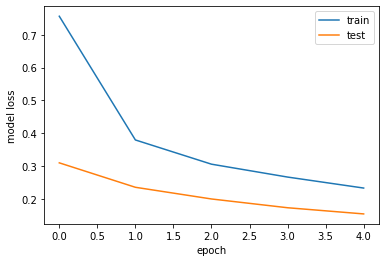

In [12]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


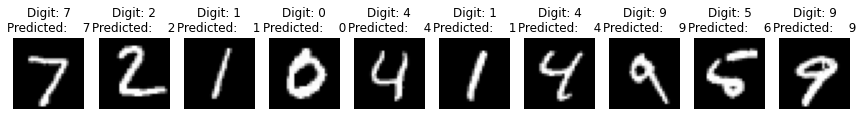

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

- **Adagrad optimizer**

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2780 - accuracy: 0.9179 - val_loss: 0.1253 - val_accuracy: 0.9606
Epoch 2/5
60000/60000 [==============================] - 8s 142us/step - loss: 0.1427 - accuracy: 0.9600 - val_loss: 0.0949 - val_accuracy: 0.9702
Epoch 3/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.1107 - accuracy: 0.9686 - val_loss: 0.0832 - val_accuracy: 0.9740
Epoch 4/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.0939 - accuracy: 0.9740 - val_loss: 0.0755 - val_accuracy: 0.9757
Epoch 5/5
10000/10000 [==============================] - 0s 44us/step

Test loss: 0.06874899361641146
Test accuracy: 0.9786999821662903


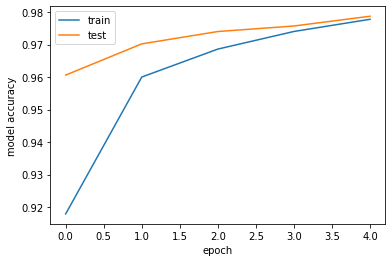

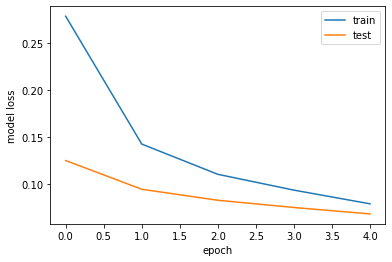

In [14]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adagrad(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


- **Adadelta optimizer**

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.2927 - accuracy: 0.9129 - val_loss: 0.1171 - val_accuracy: 0.9650
Epoch 2/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.1282 - accuracy: 0.9639 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.0911 - accuracy: 0.9740 - val_loss: 0.0774 - val_accuracy: 0.9776
Epoch 4/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.0739 - accuracy: 0.9797 - val_loss: 0.0842 - val_accuracy: 0.9768
Epoch 5/5
10000/10000 [==============================] - 0s 44us/step

Test loss: 0.07088171870256774
Test accuracy: 0.9811000227928162


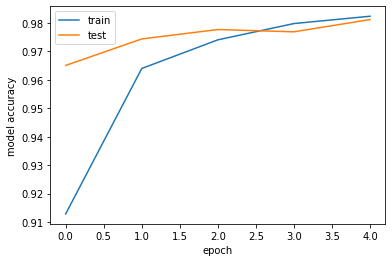

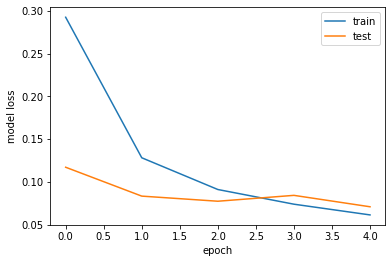

In [15]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


- **Adamax optimizer**

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3330 - accuracy: 0.9029 - val_loss: 0.1412 - val_accuracy: 0.9583
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.1524 - accuracy: 0.9571 - val_loss: 0.0936 - val_accuracy: 0.9703
Epoch 3/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.1058 - accuracy: 0.9698 - val_loss: 0.0764 - val_accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.0844 - accuracy: 0.9757 - val_loss: 0.0681 - val_accuracy: 0.9790
Epoch 5/5
10000/10000 [==============================] - 0s 44us/step

Test loss: 0.06415826639286243
Test accuracy: 0.9797999858856201


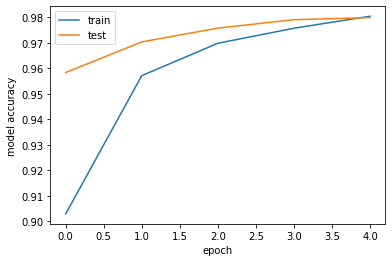

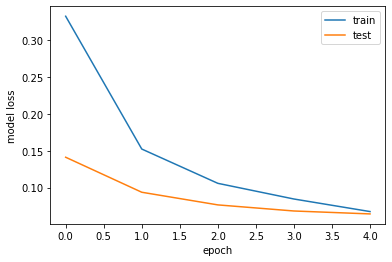

In [16]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adamax(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


## **Exercise 12.2**

I've created the CNN taking inspiration from the one suggested. After some attempts I've found a network that gave me good results, developed in this way:
-  a convolutional layer made of 20 filters
- a pooling layer (maxpooling 2x2)
- a convolutional layer made of 25 filters
- a pooling layer (maxpooling 2x2)
- a flatten layer
- a dense layer of 30 neurons
- an output layer of 10 neurons

Obviously I've started from a simple model and added layers gradually. The network was then trained on the MNIST datas. I consider the results good because I've an high accuracy, and, in the final test, the model predicts well all the numbers I try.

In [22]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [0]:
def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(25, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 745us/step - loss: 0.4953 - accuracy: 0.8455 - val_loss: 0.1582 - val_accuracy: 0.9515
Epoch 2/5
60000/60000 [==============================] - 44s 740us/step - loss: 0.1374 - accuracy: 0.9582 - val_loss: 0.0928 - val_accuracy: 0.9720
Epoch 3/5
60000/60000 [==============================] - 44s 739us/step - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.0772 - val_accuracy: 0.9755
Epoch 4/5
60000/60000 [==============================] - 44s 736us/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0651 - val_accuracy: 0.9806
Epoch 5/5
10000/10000 [==============================] - 3s 258us/step

Test loss: 0.05204247563239187
Test accuracy: 0.9847999811172485


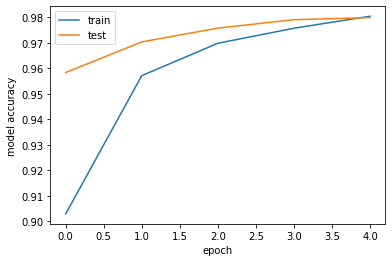

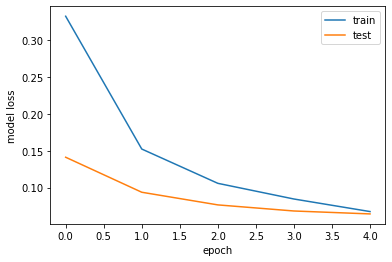

In [24]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


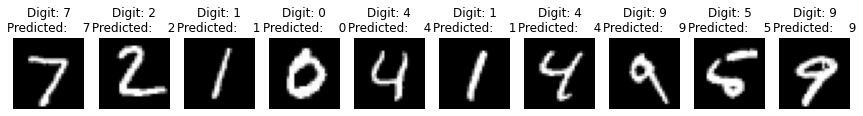

In [25]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## **Exercise 12.3**

I've tested the CNN developed in the previous exercise with digits written by me. To avoid having a jupyter to long I've reported just the example with one digit, but you can test with others just changing the digit_filename. The results I've found is that the code works fine with all the numbers except from 9, that is written in a different way from the ones used to train the model.

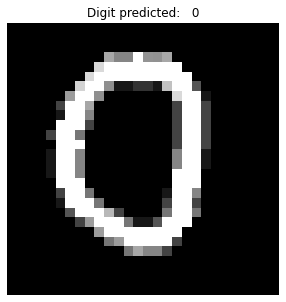

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

digit_filename = "0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data = data.reshape(1,xdim*ydim)
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred_0 = model_CNN.predict(data)
data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:   {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()